In [1]:
import fashionmnist.utils.mnist_reader as mnist_reader
from MLP.main import ThreeLayerNet
from MLP.common.optimizers import SGD, Adam
from MLP.common.np import *
from MLP.common.trainer import Trainer

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")


cacheDir = "./cache"

X_train_org, y_train_org = mnist_reader.load_mnist(
    "./fashionmnist/data/fashion", kind="train"
)
X_test, y_test = mnist_reader.load_mnist("./fashionmnist/data/fashion", kind="t10k")

# shuffle the training set
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train_org, y_train_org = X_train_org[shuffle_index], y_train_org[shuffle_index]

# get 5000 samples from training set for validation
X_val, y_val = X_train_org[55000:, :], y_train_org[55000:]
X_train, y_train = X_train_org[:55000, :], y_train_org[:55000]

In [2]:
trainer_settings = {
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_val,
    "y_test": y_val,
}
fit_settings = {
    "verbose": True,
    "max_epoch": 20,
}


# hidden_sizes = [64, 128, 256]
# lrs = [0.01, 0.001, 0.0001]
# l2_regs = [0.0001, 0.001, 0.01]

hidden_size1 = 256
hidden_size2 = 128
lrs = [0.01]
l2_regs = [0.001]
# l2_regs = [0]

best_params = None
highest_accuracy = 0

# 遍历所有参数组合
for lr in lrs:
    for l2_reg in l2_regs:
        # 更新参数设置
        model_settings = {
            "input_size": 28 * 28,
            "hidden_size1": hidden_size1,
            "hidden_size2": hidden_size2,
            "output_size": 10,
        }

        optimizer_settings = {
            "lr": lr,
            "l2_reg": l2_reg,
        }

        # 创建并训练模型
        model = ThreeLayerNet(**model_settings)
        optimizer = SGD(**optimizer_settings)

        trainer = Trainer(model, optimizer, **trainer_settings)
        trainer.fit(**fit_settings)

        # 如果这个模型的准确率更高，就更新最佳参数和最高准确率
        if trainer.accuracy["test"][-1] > highest_accuracy:
            highest_accuracy = trainer.accuracy["test"][-1]
            best_params = {
                "hidden_size1": hidden_size1,
                "hidden_size2": hidden_size2,
                "lr": lr,
                "l2_reg": l2_reg,
            }

print("Best params:", best_params)

  0%|          | 0/1718 [00:00<?, ?it/s]

| epoch 1 | time 3[s] | loss 1.74


  0%|          | 0/1718 [00:00<?, ?it/s]

| epoch 2 | time 6[s] | loss 1.12


  0%|          | 0/1718 [00:00<?, ?it/s]

| epoch 3 | time 9[s] | loss 0.73


/home/twh/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  0%|          | 0/1718 [00:00<?, ?it/s]

| epoch 4 | time 12[s] | loss 0.61


  0%|          | 0/1718 [00:00<?, ?it/s]

| epoch 5 | time 15[s] | loss 0.57
Best metrics saved to cache/best_metrics.json
Best params: {'hidden_size1': 128, 'hidden_size2': 64, 'lr': 0.01, 'l2_reg': 0}


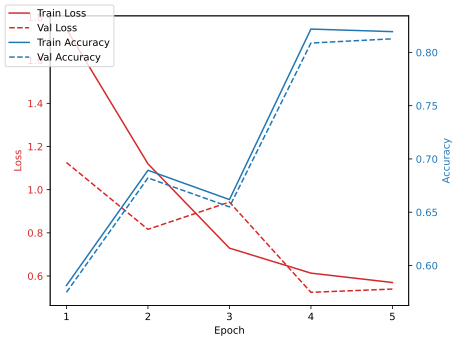

In [3]:
trainer.plot()

In [4]:
(model.compute_accuracy(X_train, y_train), model.compute_accuracy(X_test, y_test))

(0.8195090909090909, 0.8075)